### Machine Learning
### Random Forest using scikit-learn and h2o
#### Edgar Acuna
#### April 2019

In [1]:
import h2o
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\EDGAR2~1\AppData\Local\Temp\tmpfopybgc_
  JVM stdout: C:\Users\EDGAR2~1\AppData\Local\Temp\tmpfopybgc_\h2o_edgar2017_started_from_python.out
  JVM stderr: C:\Users\EDGAR2~1\AppData\Local\Temp\tmpfopybgc_\h2o_edgar2017_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,2 months and 16 days
H2O cluster name:,H2O_from_python_edgar2017_lfhgkq
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### I- Applying Random Forest to Diabetes using H20. 

In [2]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ORandomForestEstimator(ntrees=50,nfolds=10,max_depth=10)
model.train(myx, myy, training_frame = diabetes)
y_pred=model.predict(diabetes)
print ((y_pred['predict']==diabetes['C9']).mean())

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
[0.9661458333333334]


In [3]:
model.model_performance(diabetes)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.04060278229257935
RMSE: 0.20150132082092997
LogLoss: 0.18085237559787837
Mean Per-Class Error: 0.011731343283582163
AUC: 0.9993097014925373
pr_auc: 0.9950131497040178
Gini: 0.9986194029850746
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4206421607732773: 


,1,2,Error,Rate
1,492.0,8.0,0.016,(8.0/500.0)
2,2.0,266.0,0.0075,(2.0/268.0)
Total,494.0,274.0,0.013,(10.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4206422,0.9815498,178.0
max f2,0.4086367,0.9888889,181.0
max f0point5,0.5236375,0.9860248,160.0
max accuracy,0.4798779,0.9869792,169.0
max precision,0.9755556,1.0,0.0
max recall,0.3407379,1.0,197.0
max specificity,0.9755556,1.0,0.0
max absolute_mcc,0.4206422,0.9716335,178.0
max min_per_class_accuracy,0.4324530,0.9850746,175.0
max mean_per_class_accuracy,0.4206422,0.9882687,178.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.95 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9538997,2.8656716,2.8656716,1.0,0.9630289,1.0,0.9630289,0.0298507,0.0298507,186.5671642,186.5671642
,2,0.0208333,0.9469816,2.8656716,2.8656716,1.0,0.9504868,1.0,0.9567579,0.0298507,0.0597015,186.5671642,186.5671642
,3,0.03125,0.9366542,2.8656716,2.8656716,1.0,0.9412038,1.0,0.9515732,0.0298507,0.0895522,186.5671642,186.5671642
,4,0.0403646,0.9248951,2.8656716,2.8656716,1.0,0.9305628,1.0,0.9468289,0.0261194,0.1156716,186.5671642,186.5671642
,5,0.0507812,0.9167429,2.8656716,2.8656716,1.0,0.9204131,1.0,0.9414103,0.0298507,0.1455224,186.5671642,186.5671642
,6,0.1002604,0.8833556,2.8656716,2.8656716,1.0,0.9006943,1.0,0.9213167,0.1417910,0.2873134,186.5671642,186.5671642
,7,0.1510417,0.8380099,2.8656716,2.8656716,1.0,0.8610293,1.0,0.9010476,0.1455224,0.4328358,186.5671642,186.5671642
,8,0.2005208,0.7817201,2.8656716,2.8656716,1.0,0.8080471,1.0,0.8780995,0.1417910,0.5746269,186.5671642,186.5671642
,9,0.3007812,0.6170654,2.8656716,2.8656716,1.0,0.7042512,1.0,0.8201500,0.2873134,0.8619403,186.5671642,186.5671642
,10,0.3997396,0.3022503,1.3951296,2.5016287,0.4868421,0.4519831,0.8729642,0.7290077,0.1380597,1.0,39.5129615,150.1628664


### Showing the confusion matrix including the accuracy estimated by out-of-bag and Cross-validation

In [4]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
model.confusion_matrix

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1554394991867_1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.15733990617409263
RMSE: 0.3966609461165702
LogLoss: 0.5202499167425653
Mean Per-Class Error: 0.24034328358208956
AUC: 0.8312350746268656
pr_auc: 0.6899695974088073
Gini: 0.6624701492537313
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3448919653892517: 


,1,2,Error,Rate
1,366.0,134.0,0.268,(134.0/500.0)
2,57.0,211.0,0.2127,(57.0/268.0)
Total,423.0,345.0,0.2487,(191.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3448920,0.6884176,216.0
max f2,0.1605655,0.8031746,305.0
max f0point5,0.5574561,0.6884058,129.0
max accuracy,0.5574561,0.7747396,129.0
max precision,0.9690083,1.0,0.0
max recall,0.0,1.0,399.0
max specificity,0.9690083,1.0,0.0
max absolute_mcc,0.4658581,0.4988442,165.0
max min_per_class_accuracy,0.3843952,0.75,199.0
max mean_per_class_accuracy,0.3448920,0.7596567,216.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.95 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9269970,2.5074627,2.5074627,0.875,0.9407818,0.875,0.9407818,0.0261194,0.0261194,150.7462687,150.7462687
,2,0.0208333,0.8974228,2.1492537,2.3283582,0.75,0.9148868,0.8125,0.9278343,0.0223881,0.0485075,114.9253731,132.8358209
,3,0.03125,0.8823525,2.1492537,2.2686567,0.75,0.8913223,0.7916667,0.9156636,0.0223881,0.0708955,114.9253731,126.8656716
,4,0.0403646,0.8575794,1.6375267,2.1261435,0.5714286,0.8682060,0.7419355,0.9049474,0.0149254,0.0858209,63.7526652,112.6143476
,5,0.0507812,0.8333333,2.5074627,2.2043628,0.875,0.8468079,0.7692308,0.8930213,0.0261194,0.1119403,150.7462687,120.4362801
,6,0.1002604,0.7648179,2.1869599,2.1957744,0.7631579,0.7991948,0.7662338,0.8467173,0.1082090,0.2201493,118.6959937,119.5774375
,7,0.1510417,0.7100530,2.4247991,2.2727741,0.8461538,0.7361318,0.7931034,0.8095377,0.1231343,0.3432836,142.4799082,127.2774061
,8,0.2005208,0.6314605,2.0361351,2.2143826,0.7105263,0.6683454,0.7727273,0.7746980,0.1007463,0.4440299,103.6135114,121.4382632
,9,0.3007812,0.5216212,1.5630936,1.9972863,0.5454545,0.5745877,0.6969697,0.7079946,0.1567164,0.6007463,56.3093623,99.7286296
,10,0.3997396,0.4055618,1.2820110,1.8202149,0.4473684,0.4574135,0.6351792,0.6459615,0.1268657,0.7276119,28.2010998,82.0214886




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.15908153515560997
RMSE: 0.398850266585858
LogLoss: 0.4834017254480725
Mean Per-Class Error: 0.23334328358208956
AUC: 0.8299402985074626
pr_auc: 0.6787627123403609
Gini: 0.6598805970149253
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3615589341521263: 


,1,2,Error,Rate
1,373.0,127.0,0.254,(127.0/500.0)
2,57.0,211.0,0.2127,(57.0/268.0)
Total,430.0,338.0,0.2396,(184.0/768.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3615589,0.6963696,212.0
max f2,0.1567614,0.7982401,307.0
max f0point5,0.5004759,0.6781046,156.0
max accuracy,0.48,0.7734375,165.0
max precision,0.9639256,1.0,0.0
max recall,0.0030598,1.0,395.0
max specificity,0.9639256,1.0,0.0
max absolute_mcc,0.3615589,0.5120853,212.0
max min_per_class_accuracy,0.3821963,0.7537313,203.0
max mean_per_class_accuracy,0.3615589,0.7666567,212.0


Gains/Lift Table: Avg response rate: 34.90 %, avg score: 35.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104167,0.9136078,2.1492537,2.1492537,0.75,0.9417884,0.75,0.9417884,0.0223881,0.0223881,114.9253731,114.9253731
,2,0.0208333,0.8796530,2.5074627,2.3283582,0.875,0.8955936,0.8125,0.9186910,0.0261194,0.0485075,150.7462687,132.8358209
,3,0.03125,0.8533200,1.4328358,2.0298507,0.5,0.8629844,0.7083333,0.9001221,0.0149254,0.0634328,43.2835821,102.9850746
,4,0.0403646,0.8367854,2.4562900,2.1261435,0.8571429,0.8444026,0.7419355,0.8875403,0.0223881,0.0858209,145.6289979,112.6143476
,5,0.0507812,0.8151055,2.8656716,2.2778416,1.0,0.8235697,0.7948718,0.8744181,0.0298507,0.1156716,186.5671642,127.7841561
,6,0.1002604,0.7441948,1.9607227,2.1213413,0.6842105,0.7731828,0.7402597,0.8244579,0.0970149,0.2126866,96.0722702,112.1341345
,7,0.1510417,0.6873273,2.4247991,2.2233659,0.8461538,0.7119522,0.7758621,0.7866327,0.1231343,0.3358209,142.4799082,122.3365929
,8,0.2005208,0.6222226,1.8098979,2.1213413,0.6315789,0.6574433,0.7402597,0.7547548,0.0895522,0.4253731,80.9897879,112.1341345
,9,0.3007812,0.5053617,1.7119597,1.9848808,0.5974026,0.5603011,0.6926407,0.6899369,0.1716418,0.5970149,71.1959682,98.4880791
,10,0.3997396,0.4006758,1.2820110,1.8108805,0.4473684,0.4558008,0.6319218,0.6319749,0.1268657,0.7238806,28.2010998,81.0880451



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.7941692,0.0291359,0.7894737,0.7912088,0.7594937,0.7764706,0.7272728,0.7619048,0.8030303,0.8275862,0.8219178,0.8833333
auc,0.8349878,0.0283059,0.8169643,0.8403061,0.8204134,0.8317143,0.7803175,0.7958333,0.8169869,0.8804714,0.8396226,0.9272487
err,0.2058308,0.0291359,0.2105263,0.2087912,0.2405063,0.2235294,0.2727273,0.2380952,0.1969697,0.1724138,0.1780822,0.1166667
err_count,16.0,3.0983868,16.0,19.0,19.0,19.0,24.0,15.0,13.0,15.0,13.0,7.0
f0point5,0.6898209,0.0581882,0.7327586,0.7077625,0.7142857,0.7109005,0.5491329,0.5263158,0.7368421,0.7692308,0.6666667,0.7843137
f1,0.7151012,0.0528405,0.68,0.7654321,0.7710843,0.7594937,0.6129032,0.5714286,0.6829268,0.7761194,0.7111111,0.8205128
f2,0.7480622,0.0621916,0.6343284,0.8333333,0.8376963,0.8152174,0.6934307,0.625,0.6363636,0.7831326,0.7619048,0.8602151
lift_top_group,2.3517992,0.8843688,2.7142856,2.6,2.1944444,0.0,3.52,0.0,2.8695652,2.6363637,3.65,3.3333333
logloss,0.4800245,0.0398065,0.4921778,0.4725723,0.5782871,0.5087191,0.5298572,0.4846646,0.4821672,0.4376878,0.4620945,0.3520176
max_per_class_error,0.2831072,0.0590361,0.3928571,0.2678571,0.3488372,0.28,0.2857143,0.3333333,0.3913043,0.2121212,0.2,0.1190476


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-04 12:23:25,5.246 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-04-04 12:23:25,5.253 sec,1.0,0.5813876,10.9160662,0.6094502,0.2495320,1.3978886,0.6498195
,2019-04-04 12:23:25,5.259 sec,2.0,0.5472379,8.6507150,0.6439090,0.2865838,1.3546811,0.3560440
,2019-04-04 12:23:25,5.266 sec,3.0,0.5054377,6.4673891,0.6960680,0.3283977,1.4840085,0.3090586
,2019-04-04 12:23:25,5.271 sec,4.0,0.4939311,5.4398211,0.7091014,0.3736825,1.4997908,0.3057722
---,---,---,---,---,---,---,---,---,---
,2019-04-04 12:23:25,5.568 sec,46.0,0.3966944,0.5203578,0.8314888,0.6880362,2.2288557,0.25
,2019-04-04 12:23:25,5.575 sec,47.0,0.3972828,0.5219870,0.8307239,0.6857105,2.1492537,0.2460938
,2019-04-04 12:23:25,5.584 sec,48.0,0.3972137,0.5225024,0.8306604,0.6868829,2.1492537,0.2526042
,2019-04-04 12:23:25,5.591 sec,49.0,0.3973210,0.5232169,0.8301791,0.6865195,2.2288557,0.2526042



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C2,1486.2714844,1.0,0.2940479
C8,795.8626099,0.5354759,0.1574556
C6,718.2009888,0.4832233,0.1420908
C7,549.9766235,0.3700378,0.1088088
C1,434.5032349,0.2923445,0.0859633
C3,410.9892883,0.2765237,0.0813112
C5,346.2369080,0.2329567,0.0685004
C4,312.4804382,0.2102445,0.0618220


<bound method H2OBinomialModel.confusion_matrix of >

### Finding the importance of each feature

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

<Figure size 640x480 with 1 Axes>

#### According to  random Forest  the most important predictors are plas, age y mass

### II Random Forest  for Diabetes using scikit learn

In [9]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
#La variable de respuesta y debe ser binaria (0,1)
y=data['class']-1
X=data.iloc[:,0:8]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True,random_state=0)
clf.fit(X, y)
print("The accuracy estimated is", clf.score(X,y))

The accuracy estimated is 0.9869791666666666


#### Estimating the accuracy

In [10]:
# Tasa de precision
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       1.00      0.97      0.98       268

   micro avg       0.99      0.99      0.99       768
   macro avg       0.99      0.98      0.99       768
weighted avg       0.99      0.99      0.99       768



In [11]:
print(confusion_matrix(y,predictions))

[[499   1]
 [  9 259]]


Estimating the accuracy by cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
rfmodel=clf.fit(X, y)
scores = cross_val_score(rfmodel, X, y, cv=10)
scores
#Hallando la precision media y un intervalo de confianza 
print("CV Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.758 (+/- 0.095)


Estimating the accuracy by Out-of-Bag

In [14]:
#Tasa de precision usando out-of-Bag
print(clf.oob_score_)

0.7421875


#### Finding the most important features 

In [15]:
print(clf.feature_importances_)

[0.08178093 0.25522871 0.08433383 0.07064764 0.06914087 0.17326173
 0.12167218 0.14393411]


#### The most important features are the same as above:  plas, mass and age

### III. Random Forest para Landsat usando H2o

In [18]:
#Leyendo los datos
datos= h2o.import_file("http://academic.uprm.edu/eacuna/landsat.txt")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36']
datos['C37']=datos['C37'].asfactor()
myy="C37"
model=H2ORandomForestEstimator(ntrees=50,max_depth=10,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C37']).sum()/float(len(datos)))
model.model_performance(datos)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
0.9819616685456595

ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.027187529484963575
RMSE: 0.16488641388836006
LogLoss: 0.1156564231055531
Mean Per-Class Error: 0.028476808394431303
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1072.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,072"
0.0,477.0,0.0,0.0,2.0,0.0,0.0041754,2 / 479
0.0,0.0,961.0,0.0,0.0,0.0,0.0,0 / 961
0.0,0.0,33.0,367.0,0.0,15.0,0.1156627,48 / 415
12.0,0.0,0.0,0.0,451.0,7.0,0.0404255,19 / 470
0.0,0.0,3.0,8.0,0.0,1027.0,0.0105973,"11 / 1,038"
1084.0,477.0,997.0,375.0,453.0,1049.0,0.0180383,"80 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9819617
2,0.9995490
3,1.0
4,1.0
5,1.0
6,1.0


In [19]:
#Mostrando la matrix de confusion para estimar la precision out-of-bag y por validacion crizada
print(model.confusion_matrix)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1554394991867_665


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.08638505121979284
RMSE: 0.29391333964247496
LogLoss: 0.30693141132247526
Mean Per-Class Error: 0.12743619762291147
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1055.0,2.0,12.0,0.0,3.0,0.0,0.0158582,"17 / 1,072"
0.0,467.0,2.0,3.0,4.0,3.0,0.0250522,12 / 479
4.0,1.0,931.0,17.0,0.0,8.0,0.0312175,30 / 961
5.0,5.0,84.0,244.0,3.0,74.0,0.4120482,171 / 415
33.0,6.0,0.0,6.0,388.0,37.0,0.1744681,82 / 470
1.0,1.0,23.0,68.0,17.0,928.0,0.1059730,"110 / 1,038"
1098.0,482.0,1052.0,338.0,415.0,1050.0,0.0951522,"422 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9048478
2,0.9812852
3,0.9952650
4,0.9975197
5,0.9986472
6,1.0



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.08564872357635715
RMSE: 0.2926580317988166
LogLoss: 0.27579710990193973
Mean Per-Class Error: 0.12784987672431208
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



1,2,3,4,5,6,Error,Rate
1050.0,3.0,16.0,0.0,3.0,0.0,0.0205224,"22 / 1,072"
1.0,471.0,1.0,1.0,2.0,3.0,0.0167015,8 / 479
7.0,1.0,926.0,19.0,0.0,8.0,0.0364204,35 / 961
5.0,4.0,85.0,242.0,2.0,77.0,0.4168675,173 / 415
35.0,7.0,0.0,4.0,388.0,36.0,0.1744681,82 / 470
0.0,1.0,24.0,61.0,20.0,932.0,0.1021195,"106 / 1,038"
1098.0,487.0,1052.0,327.0,415.0,1056.0,0.0960541,"426 / 4,435"


Top-6 Hit Ratios: 


k,hit_ratio
1,0.9039459
2,0.9839910
3,0.9968433
4,0.9988726
5,0.9995490
6,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
accuracy,0.9044076,0.0095977,0.9020045,0.9188544,0.9011495,0.8734940,0.9064588,0.9078652,0.8901869,0.9058296,0.9170616,0.9211712
err,0.0955924,0.0095977,0.0979955,0.0811456,0.0988506,0.1265060,0.0935412,0.0921348,0.1098131,0.0941704,0.0829384,0.0788288
err_count,42.6,5.6142673,44.0,34.0,43.0,63.0,42.0,41.0,47.0,42.0,35.0,35.0
logloss,0.2751651,0.0153390,0.2747088,0.2622232,0.2586900,0.3154771,0.2889058,0.2880751,0.2991842,0.2704795,0.2538601,0.2400472
max_per_class_error,0.4154271,0.0363236,0.42,0.3658537,0.4473684,0.48,0.3684211,0.3953488,0.525,0.3720930,0.3684211,0.4117647
mean_per_class_accuracy,0.8725048,0.0106724,0.8677720,0.8951866,0.8600678,0.8489747,0.8615637,0.8716582,0.859198,0.8784852,0.8933191,0.888823
mean_per_class_error,0.1274952,0.0106724,0.1322280,0.1048134,0.1399322,0.1510254,0.1384363,0.1283419,0.140802,0.1215148,0.1066808,0.1111770
mse,0.0853976,0.0057164,0.0867743,0.0836335,0.0796978,0.1034268,0.0839662,0.0898378,0.0929224,0.0826500,0.0778207,0.0732460
r2,0.9756779,0.0020389,0.9747530,0.9762809,0.9782822,0.9697104,0.9772769,0.9737886,0.9730698,0.9758587,0.9771375,0.9806212
rmse,0.2919101,0.0096448,0.2945747,0.2891946,0.282308,0.3216003,0.2897693,0.2997296,0.3048318,0.2874891,0.2789637,0.2706400


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2019-04-04 12:27:40,14.763 sec,0.0,nan,nan,nan
,2019-04-04 12:27:40,14.791 sec,1.0,0.3760475,3.7146705,0.1547030
,2019-04-04 12:27:40,14.813 sec,2.0,0.3826382,3.6365654,0.1638734
,2019-04-04 12:27:40,14.835 sec,3.0,0.3719867,3.2225371,0.1598579
,2019-04-04 12:27:40,14.857 sec,4.0,0.3570550,2.6381985,0.1500399
---,---,---,---,---,---,---
,2019-04-04 12:27:41,15.796 sec,46.0,0.2938603,0.3145523,0.0960541
,2019-04-04 12:27:41,15.821 sec,47.0,0.2938949,0.3075620,0.0953777
,2019-04-04 12:27:41,15.845 sec,48.0,0.2938103,0.3071507,0.0958286
,2019-04-04 12:27:41,15.869 sec,49.0,0.2940385,0.3074730,0.0962796



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C17,8049.4428711,1.0,0.0619282
C20,7875.8530273,0.9784346,0.0605927
C14,7375.5043945,0.9162751,0.0567433
C18,7189.2036133,0.8931306,0.0553100
C13,6852.3862305,0.8512870,0.0527187
---,---,---,---
C15,1021.2236938,0.1268689,0.0078568
C3,956.9251709,0.1188809,0.0073621
C27,942.5721436,0.1170978,0.0072517
C11,923.6338501,0.1147451,0.0071060



See the whole table with table.as_data_frame()
<bound method H2OMultinomialModel.confusion_matrix of >


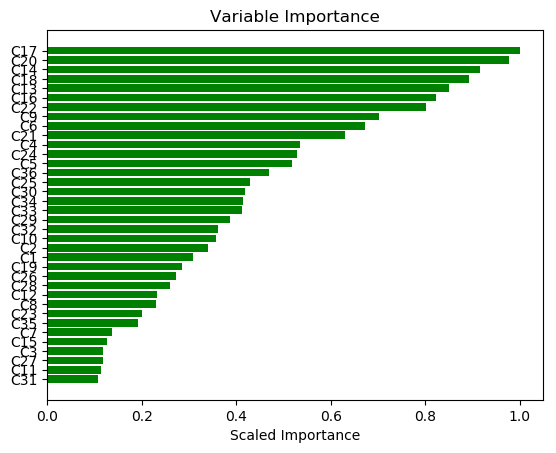

In [20]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance =model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

#### The six   most important features are: c18, c17, c22, c21, c24 y c20

### IV. Random Forest para Landsat usando Scikit-Learn

In [22]:
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]-1
names=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13',
            'C14','C15','C16','C17','C18','C19','C20','C21','C22','C23','C24','C25','C26','C27',
           'C28','C29', 'C30','C31','C32','C33','C34','C35','C36','C37']
X=data.iloc[:,0:36]
clf = RandomForestClassifier(n_estimators=50,max_depth=10, oob_score=True, random_state=0)
clf.fit(X, y)
print("la Precision estimada es", clf.score(X,y))

la Precision estimada es 0.97271702367531


In [23]:
predictions = clf.predict(X)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1072
           1       1.00      1.00      1.00       479
           2       0.95      1.00      0.97       961
           3       0.98      0.80      0.88       415
           4       1.00      0.93      0.97       470
           5       0.96      0.99      0.98      1038

   micro avg       0.97      0.97      0.97      4435
   macro avg       0.98      0.96      0.97      4435
weighted avg       0.97      0.97      0.97      4435



In [26]:
#Estimacion del error usando out-of-bag
print(clf.oob_score_)

0.8985343855693348


In [27]:
a=clf.feature_importances_
print(np.argsort(a))

[26 10 30 34  6  2  7  3 22  0  9 35  8  1 14 11 25 29  5 27 18 28 23 32
 15 12  4 31 33 13 21 24 19 20 17 16]


#### The six most important features are: 17, 18, 21, 20, 25 y 22

### V. Applying Random Forest   to the adult dataset which contains missing values 

In [30]:
#Leyendo los datos
datos= h2o.import_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",na_strings=[' ?'])
myx=['C1', 'C2', 'C3', 'C4', 'C5','C6','C7','C8','C9','C10','C11', 'C12','C13','C14']
datos['C15']=datos['C15'].asfactor()
myy="C15"
model=H2ORandomForestEstimator(ntrees=100,max_depth=20,nfolds=10)
model.train(myx, myy, training_frame = datos)
y_pred=model.predict(datos)
print ((y_pred['predict']==datos['C15']).sum()/float(len(datos)))
model.model_performance(datos)

ValueError: ImportFiles of 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' failed on ['https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data']

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()